In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image


C:\Users\rumma\AppData\Local\Temp\ipykernel_24036\3216498016.py:21: RuntimeWarning: invalid value encountered in divide
  return (green - nir) / (green + nir )
C:\Users\rumma\AppData\Local\Temp\ipykernel_24036\3216498016.py:25: RuntimeWarning: invalid value encountered in divide
  return (nir - swir) / (nir + swir )
C:\Users\rumma\AppData\Local\Temp\ipykernel_24036\3216498016.py:51: RuntimeWarning: invalid value encountered in cast
  norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


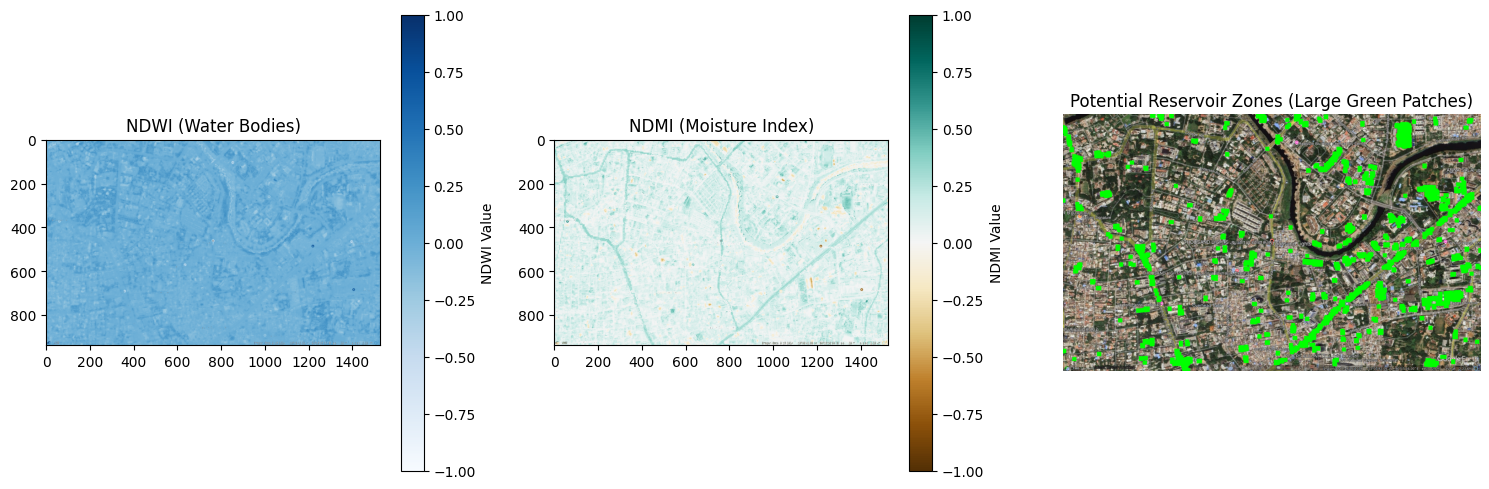

NDWI, NDMI, and Large Green Patch analysis completed successfully!
NDWI saved to: ./output/ThousandLights\NDWI.png
NDMI saved to: ./output/ThousandLights\NDMI.png
Potential Reservoir Zones saved to: ./output/ThousandLights\Potential_Reservoir_Zones.png


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the uploaded satellite image
image_path = "./Locations/ThousandLights.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir )

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir )

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.4)  # Threshold for identifying green areas

# Remove small patches using morphological operations
kernel = np.ones((15, 15), np.uint8)  # Adjust kernel size based on image resolution
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
output_dir = "./output/ThousandLights"
os.makedirs(output_dir, exist_ok=True)

ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 3, 2)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 3, 3)
plt.title("Potential Reservoir Zones (Large Green Patches)")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Reservoir_Analysis.png"))
plt.show()

# Print Summary
print("NDWI, NDMI, and Large Green Patch analysis completed successfully!")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


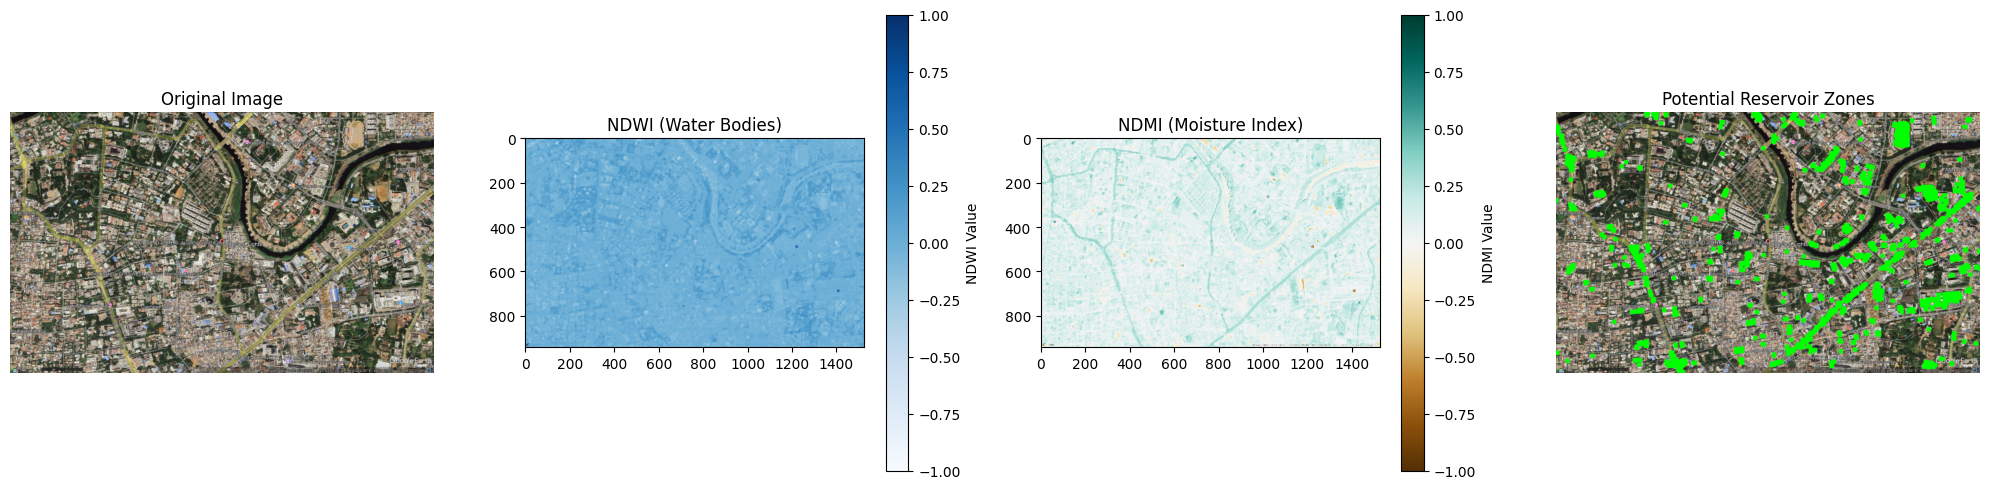

Analysis completed successfully!
Original Image saved to: ./output/ThousandLights/Original_Image.png
NDWI saved to: ./output/ThousandLights\NDWI.png
NDMI saved to: ./output/ThousandLights\NDMI.png
Potential Reservoir Zones saved to: ./output/ThousandLights\Potential_Reservoir_Zones.png
Comparison Analysis saved to: ./output/ThousandLights\Comparison_Analysis.png


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define location name
location_name = "ThousandLights"

# Paths
input_image_path = f"./Locations/{location_name}.png"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir + 1e-10)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.4)  # Threshold for identifying green areas

# Remove small patches using morphological operations
kernel = np.ones((15, 15), np.uint8)  # Adjust kernel size based on image resolution
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


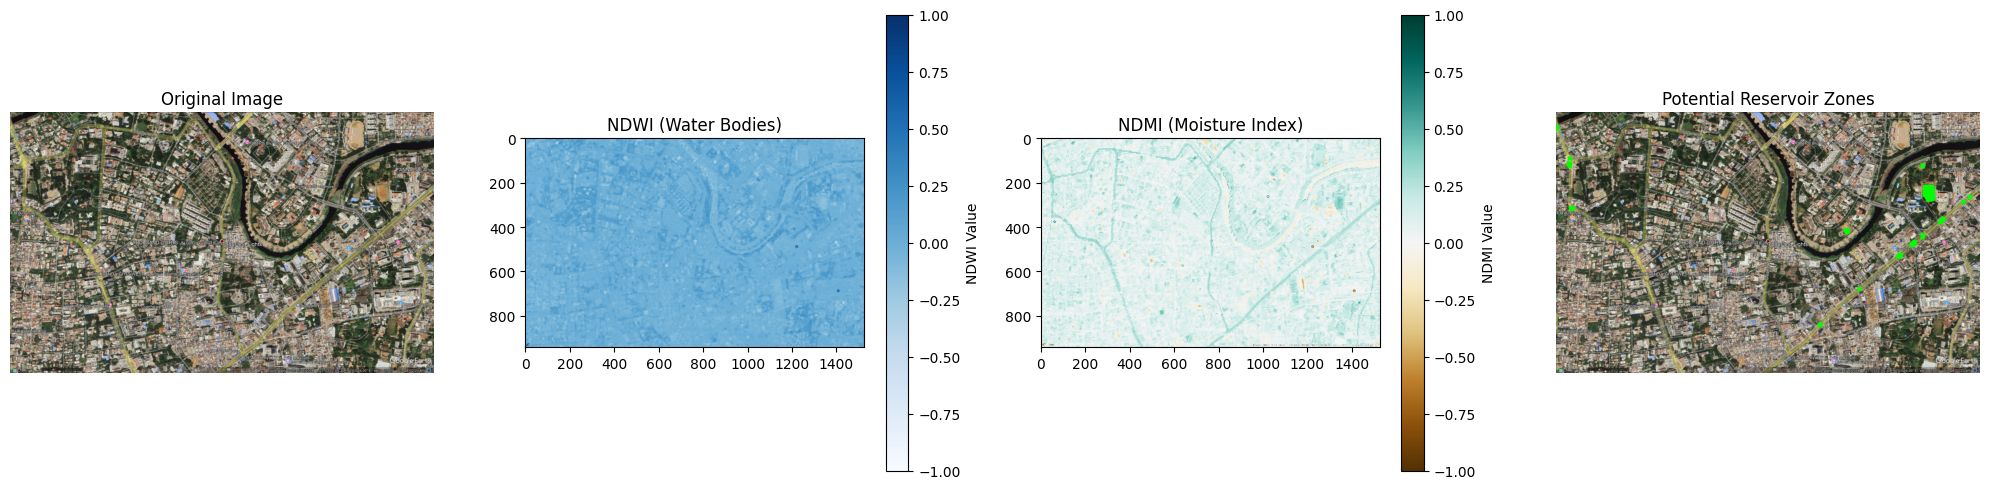

Analysis completed successfully!
Original Image saved to: ./output/ThousandLights/Original_Image.png
NDWI saved to: ./output/ThousandLights\NDWI.png
NDMI saved to: ./output/ThousandLights\NDMI.png
Potential Reservoir Zones saved to: ./output/ThousandLights\Potential_Reservoir_Zones.png
Comparison Analysis saved to: ./output/ThousandLights\Comparison_Analysis.png


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define location name
location_name = "ThousandLights"

# Paths
input_image_path = f"./Locations/{location_name}.png"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir + 1e-10)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.4)  # Threshold for identifying green areas

# Exclude beach areas (high NDWI) and urban areas (low NDMI)
beach_mask = (ndwi > 0.3) | (swir_band > 0.5)  # Beaches tend to have high NDWI values
urban_mask = ndmi < -0.1  # Urban areas tend to have low NDMI values

green_mask = green_mask & (~beach_mask) & (~urban_mask)  # Exclude beaches and urban areas

# Remove small patches using morphological operations
kernel = np.ones((15, 15), np.uint8)  # Adjust kernel size based on image resolution
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")


C:\Users\rumma\AppData\Local\Temp\ipykernel_24036\1442326061.py:32: RuntimeWarning: invalid value encountered in divide
  return (green - nir) / (green + nir)
C:\Users\rumma\AppData\Local\Temp\ipykernel_24036\1442326061.py:36: RuntimeWarning: invalid value encountered in divide
  return (nir - swir) / (nir + swir)
C:\Users\rumma\AppData\Local\Temp\ipykernel_24036\1442326061.py:67: RuntimeWarning: invalid value encountered in cast
  norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


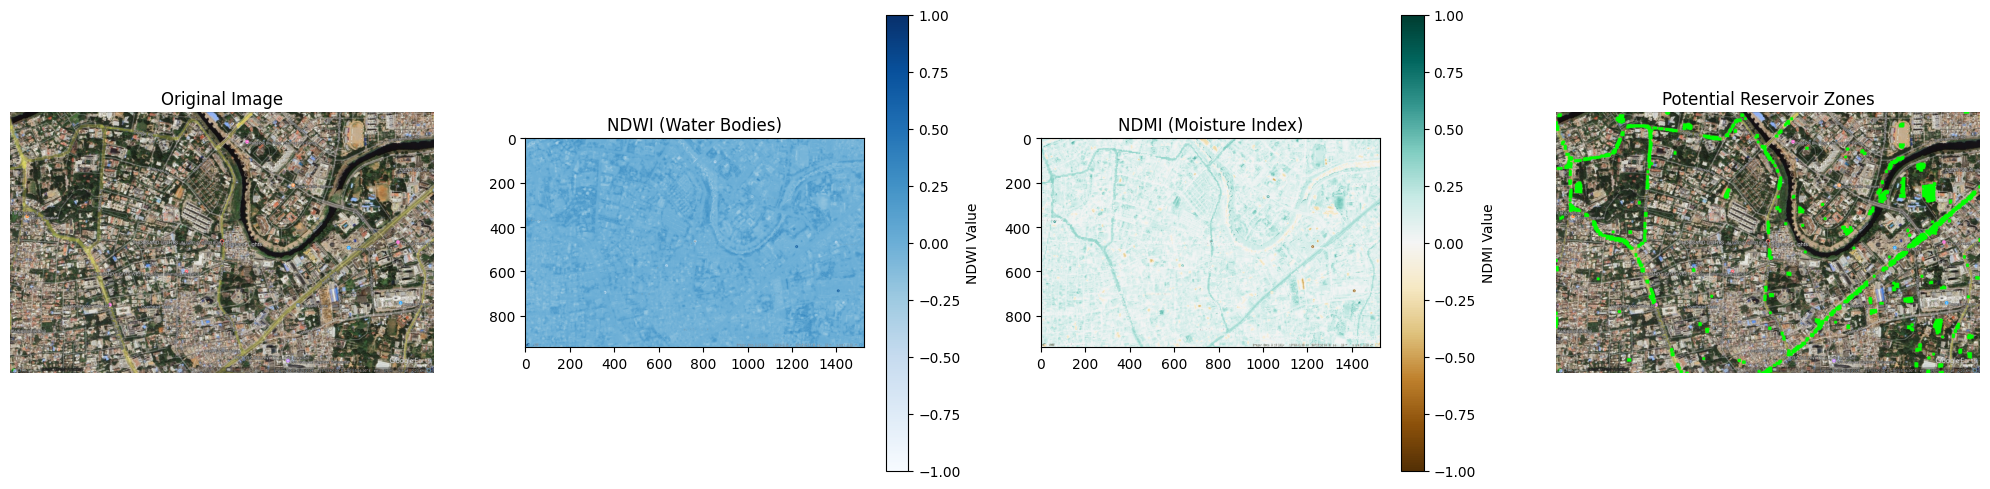

Analysis completed successfully!
Original Image saved to: ./output/ThousandLights/Original_Image.png
NDWI saved to: ./output/ThousandLights\NDWI.png
NDMI saved to: ./output/ThousandLights\NDMI.png
Potential Reservoir Zones saved to: ./output/ThousandLights\Potential_Reservoir_Zones.png
Comparison Analysis saved to: ./output/ThousandLights\Comparison_Analysis.png


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define location name
location_name = "ThousandLights"

# Paths
input_image_path = f"./Locations/{location_name}.png"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.3)  # Relaxed threshold to capture more green areas

# Exclude beach areas (high NDWI) and urban areas (low NDMI)
beach_mask = (ndwi > 0.3) | (swir_band > 0.5)  # Adjusted thresholds to refine exclusion
urban_mask = ndmi < -0.1  # More refined urban mask to differentiate uninhabited green areas

# Include uninhabited green fields by relaxing urban mask constraints
green_mask = green_mask & (~beach_mask) & (~urban_mask)

# Remove small patches using morphological operations
kernel = np.ones((10, 10), np.uint8)  # Reduced kernel size to preserve smaller patches
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import measure
import random

# Define location name
location_name = "Venus_Nagar"

# Paths
input_image_path = f"./Locations/{location_name}.jpg"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.3)  # Relaxed threshold to capture more green areas

# Exclude beach areas (high NDWI) and urban areas (low NDMI)
beach_mask = (ndwi > 0.3) | (swir_band > 0.5)  # Adjusted thresholds to refine exclusion
urban_mask = ndmi < -0.1  # More refined urban mask to differentiate uninhabited green areas

# Include uninhabited green fields by relaxing urban mask constraints
green_mask = green_mask & (~beach_mask) & (~urban_mask)

# Remove small patches using morphological operations
kernel = np.ones((10, 10), np.uint8)  # Reduced kernel size to preserve smaller patches
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")

# ... existing code ...

# After computing NDWI and NDMI, add this function:
def classify_zone(region_props, image, ndwi, ndmi, green_band):
    # Get the coordinates for this region
    coords = region_props.coords
    
    # Calculate average values for the region
    avg_ndwi = np.mean(ndwi[coords[:, 0], coords[:, 1]])
    avg_ndmi = np.mean(ndmi[coords[:, 0], coords[:, 1]])
    avg_green = np.mean(green_band[coords[:, 0], coords[:, 1]])
    
    # Classification logic
    if avg_ndwi > 0.2:
        return "Water Body"
    elif avg_green > 0.4 and avg_ndmi > 0.1:
        return "Dense Green Land"
    elif avg_green > 0.3:
        return "Green Patches"
    else:
        return "Open Ground"

# After creating large_green_patches, add:
# Label connected components
labeled_patches, num_labels = measure.label(large_green_patches, return_num=True)
region_props = measure.regionprops(labeled_patches)

# Create a colormap for different classifications
classification_colors = {
    "Water Body": [0, 0, 255],      # Blue
    "Dense Green Land": [0, 155, 0], # Dark Green
    "Green Patches": [144, 238, 144],# Light Green
    "Open Ground": [255, 222, 173]   # Light Brown
}

# Create classification map
classified_image = image.copy()
classifications = {}  # Store classifications for legend

for region in region_props:
    # Get classification for this region
    classification = classify_zone(region, image, ndwi, ndmi, green_band)
    
    # Store the classification
    classifications[region.label] = classification
    
    # Color the region according to its classification
    coords = region.coords
    classified_image[coords[:, 0], coords[:, 1]] = np.array(classification_colors[classification]) / 255.0

# Update the visualization
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Classified Zones")
plt.imshow(classified_image)

# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=np.array(color)/255.0) 
                  for color in classification_colors.values()]
plt.legend(legend_elements, classification_colors.keys(), 
          loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output, bbox_inches='tight')
plt.show()

# Save classified image
classified_output = os.path.join(output_dir, "Classified_Zones.png")
cv2.imwrite(classified_output, cv2.cvtColor(classified_image * 255, cv2.COLOR_RGB2BGR))

# Update print summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Classified Zones saved to: {classified_output}")
print(f"Comparison Analysis saved to: {comparison_output}")

# Print classification summary
print("\nZone Classifications Summary:")
classification_counts = {}
for classification in classifications.values():
    classification_counts[classification] = classification_counts.get(classification, 0) + 1
for class_name, count in classification_counts.items():
    print(f"{class_name}: {count} zones")

ModuleNotFoundError: No module named 'skimage'

In [ ]:
# !pip install scikit-image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import measure
import random

# Define location name
location_name = "Kathivakkam"

# Paths
input_image_path = f"./Locations/{location_name}.jpg"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.3)  # Relaxed threshold to capture more green areas

# Exclude beach areas (high NDWI) and urban areas (low NDMI)
beach_mask = (ndwi > 0.3) | (swir_band > 0.5)  # Adjusted thresholds to refine exclusion
urban_mask = ndmi < -0.1  # More refined urban mask to differentiate uninhabited green areas

# Include uninhabited green fields by relaxing urban mask constraints
green_mask = green_mask & (~beach_mask) & (~urban_mask)

# Remove small patches using morphological operations
kernel = np.ones((10, 10), np.uint8)  # Reduced kernel size to preserve smaller patches
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# ... existing code ...

# Add new index computation functions
def compute_ndvi(nir, red):
    return (nir - red) / (nir + red)

def compute_savi(nir, red, L=0.5):
    return ((nir - red) / (nir + red + L)) * (1 + L)

# Compute indices
ndvi = compute_ndvi(nir_band, nir_band)  # Using red band as NIR substitute
savi = compute_savi(nir_band, nir_band)  # Using red band as NIR substitute

# Define classification function
def classify_zones(ndvi, savi, ndwi, ndmi, green_band):
    classification = np.zeros_like(ndvi, dtype=np.uint8)
    
    # Classification criteria
    water_bodies = (ndwi > 0.2)
    dense_vegetation = (ndvi > 0.3) & (savi > 0.4)
    moderate_vegetation = (ndvi > 0.1) & (ndvi <= 0.3) & (savi > 0.2) & (savi <= 0.4)
    open_ground = (ndvi <= 0.1) & (savi <= 0.2)
    
    # Assign classes
    classification[water_bodies] = 1  # Water Bodies
    classification[dense_vegetation] = 2  # Dense Vegetation
    classification[moderate_vegetation] = 3  # Moderate Vegetation
    classification[open_ground] = 4  # Open Ground
    
    return classification

# Create classified zones
zones = classify_zones(ndvi, savi, ndwi, ndmi, green_band)

# Create color-coded visualization
zone_colors = {
    1: [0, 0, 1],      # Blue for Water Bodies
    2: [0, 0.8, 0],    # Dark Green for Dense Vegetation
    3: [0.4, 0.8, 0.4],# Light Green for Moderate Vegetation
    4: [0.8, 0.7, 0.6] # Light Brown for Open Ground
}

classified_image = image.copy()
for zone_id, color in zone_colors.items():
    classified_image[zones == zone_id] = color

# Save additional indices
save_image(os.path.join(output_dir, "NDVI.png"), ndvi, colormap=cv2.COLORMAP_SUMMER)
save_image(os.path.join(output_dir, "SAVI.png"), savi, colormap=cv2.COLORMAP_SUMMER)

# Update the visualization
plt.figure(figsize=(20, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("NDVI")
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI Value")

plt.subplot(2, 3, 3)
plt.title("SAVI")
plt.imshow(savi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="SAVI Value")

plt.subplot(2, 3, 4)
plt.title("NDWI")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(2, 3, 5)
plt.title("NDMI")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(2, 3, 6)
plt.title("Classified Zones")
plt.imshow(classified_image)
plt.axis("off")

# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, fc=zone_colors[i]) for i in range(1,5)]
plt.legend(legend_elements, ['Water Bodies', 'Dense Vegetation', 
                           'Moderate Vegetation', 'Open Ground'], 
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(comparison_output, bbox_inches='tight')
plt.show()

# Update summary printing
print("Analysis completed successfully!")
print("\nZone Statistics:")
for zone_id, zone_name in enumerate(['Background', 'Water Bodies', 'Dense Vegetation', 
                                   'Moderate Vegetation', 'Open Ground'], start=0):
    if zone_id > 0:  # Skip background
        count = np.sum(zones == zone_id)
        percentage = (count / np.sum(zones > 0)) * 100
        print(f"{zone_name}: {percentage:.1f}%")

# ... existing code ...

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")

# ... existing code ...

# After computing NDWI and NDMI, add this function:
def classify_zone(region_props, image, ndwi, ndmi, green_band):
    # Get the coordinates for this region
    coords = region_props.coords
    
    # Calculate average values for the region
    avg_ndwi = np.mean(ndwi[coords[:, 0], coords[:, 1]])
    avg_ndmi = np.mean(ndmi[coords[:, 0], coords[:, 1]])
    avg_green = np.mean(green_band[coords[:, 0], coords[:, 1]])
    
    # Classification logic
    if avg_ndwi > 0.2:
        return "Water Body"
    elif avg_green > 0.4 and avg_ndmi > 0.1:
        return "Dense Green Land"
    elif avg_green > 0.3:
        return "Green Patches"
    else:
        return "Open Ground"

# After creating large_green_patches, add:
# Label connected components
labeled_patches, num_labels = measure.label(large_green_patches, return_num=True)
region_props = measure.regionprops(labeled_patches)

# Create a colormap for different classifications
classification_colors = {
    "Water Body": [0, 0, 255],      # Blue
    "Dense Green Land": [0, 155, 0], # Dark Green
    "Green Patches": [144, 238, 144],# Light Green
    "Open Ground": [255, 222, 173]   # Light Brown
}

# Create classification map
classified_image = image.copy()
classifications = {}  # Store classifications for legend

for region in region_props:
    # Get classification for this region
    classification = classify_zone(region, image, ndwi, ndmi, green_band)
    
    # Store the classification
    classifications[region.label] = classification
    
    # Color the region according to its classification
    coords = region.coords
    classified_image[coords[:, 0], coords[:, 1]] = np.array(classification_colors[classification]) / 255.0

# Update the visualization
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Classified Zones")
plt.imshow(classified_image)

# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=np.array(color)/255.0) 
                  for color in classification_colors.values()]
plt.legend(legend_elements, classification_colors.keys(), 
          loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output, bbox_inches='tight')
plt.show()

# Save classified image
classified_output = os.path.join(output_dir, "Classified_Zones.png")
cv2.imwrite(classified_output, cv2.cvtColor(classified_image * 255, cv2.COLOR_RGB2BGR))

# Update print summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Classified Zones saved to: {classified_output}")
print(f"Comparison Analysis saved to: {comparison_output}")

# Print classification summary
print("\nZone Classifications Summary:")
classification_counts = {}
for classification in classifications.values():
    classification_counts[classification] = classification_counts.get(classification, 0) + 1
for class_name, count in classification_counts.items():
    print(f"{class_name}: {count} zones")